In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read Data

In [99]:
flights = sns.load_dataset('flights')

In [100]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


# Create 'Date' column from 'year' & 'month'

In [101]:
flights['month'] = pd.to_datetime(flights.month, format='%b').dt.month

In [102]:
flights['date'] = pd.to_datetime(flights[['year','month']].assign(DAY=1))

In [103]:
flights = flights.drop(flights[['year','month']], axis=1)

In [104]:
flights_2 = flights.set_index('date')

# Add 'timestep' & Model based on Linear_Regression

In [105]:
flights_2['timestep'] = list(range(len(flights)))

In [106]:
flights_2

,passengers,timestep
date,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4
...,...,...
1960-08-01,606,139
1960-09-01,508,140
1960-10-01,461,141


In [107]:
y = flights_2['passengers']
X = flights_2[['timestep']]

In [108]:
m = LinearRegression()

In [109]:
m.fit(X,y)

LinearRegression()

In [110]:
print("Coefficients: \n", m.coef_)

Coefficients: 
 [2.65718391]


In [111]:
y_pred = m.predict(X)

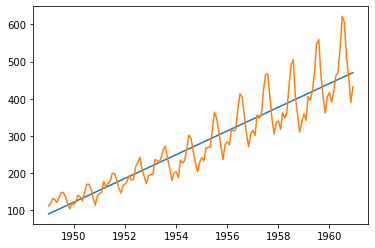

In [79]:
#plt.figure(figsize=(20,10))
plt.plot(flights['date'],y_pred)
plt.plot(flights['date'],y)
#plt.show()

In [80]:
seasonal_dummies = pd.get_dummies(flights_2.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(flights_2.index)

flights_3 = flights_2.join(seasonal_dummies)

In [81]:
flights_3

,passengers,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
1949-01-01,112,0,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,118,1,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,132,2,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,129,3,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,121,4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,139,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,508,140,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,461,141,0,0,0,0,0,0,0,0,1,0,0


In [82]:
X2 = flights_3.drop(flights[['passengers']],axis=1)
y2 = flights_3['passengers']

In [83]:
m.fit(X2,y2)

LinearRegression()

In [84]:
y_pred_2 = m.predict(X2)

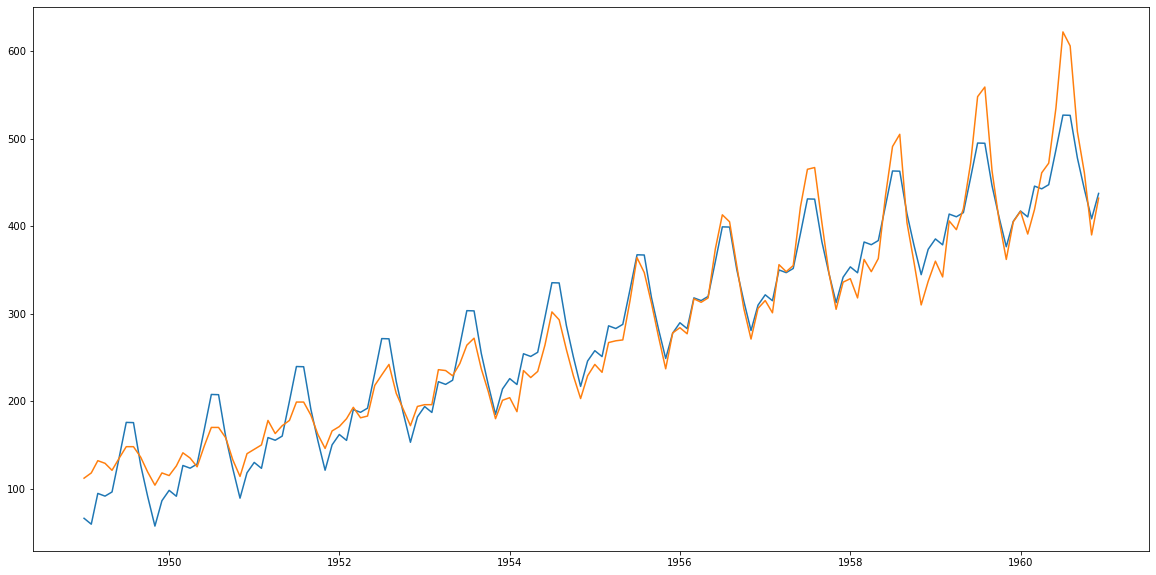

In [85]:
plt.figure(figsize=(20,10))
plt.plot(flights['date'],y_pred_2)
plt.plot(flights['date'],y2)
plt.show()

# Try log transformation 

In [86]:
import numpy as np

In [87]:
flights_4 = flights_2

In [88]:
flights_4['passengers'] = np.log(flights_2['passengers'])

In [89]:
flights_4

,passengers,timestep
date,,
1949-01-01,4.718499,0
1949-02-01,4.770685,1
1949-03-01,4.882802,2
1949-04-01,4.859812,3
1949-05-01,4.795791,4
...,...,...
1960-08-01,6.406880,139
1960-09-01,6.230481,140
1960-10-01,6.133398,141


In [90]:
seasonal_dummies = pd.get_dummies(flights_4.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(flights_4.index)

flights_5 = flights_4.join(seasonal_dummies)

In [91]:
flights_5

,passengers,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
1949-01-01,4.718499,0,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,4.770685,1,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,4.882802,2,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,4.859812,3,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,4.795791,4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,6.406880,139,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,6.230481,140,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,6.133398,141,0,0,0,0,0,0,0,0,1,0,0


In [92]:
X3 = flights_5.drop(flights[['passengers']],axis=1)
y3 = flights_5['passengers']

In [93]:
m.fit(X3,y3)

LinearRegression()

In [94]:
y_pred_3 = m.predict(X3)

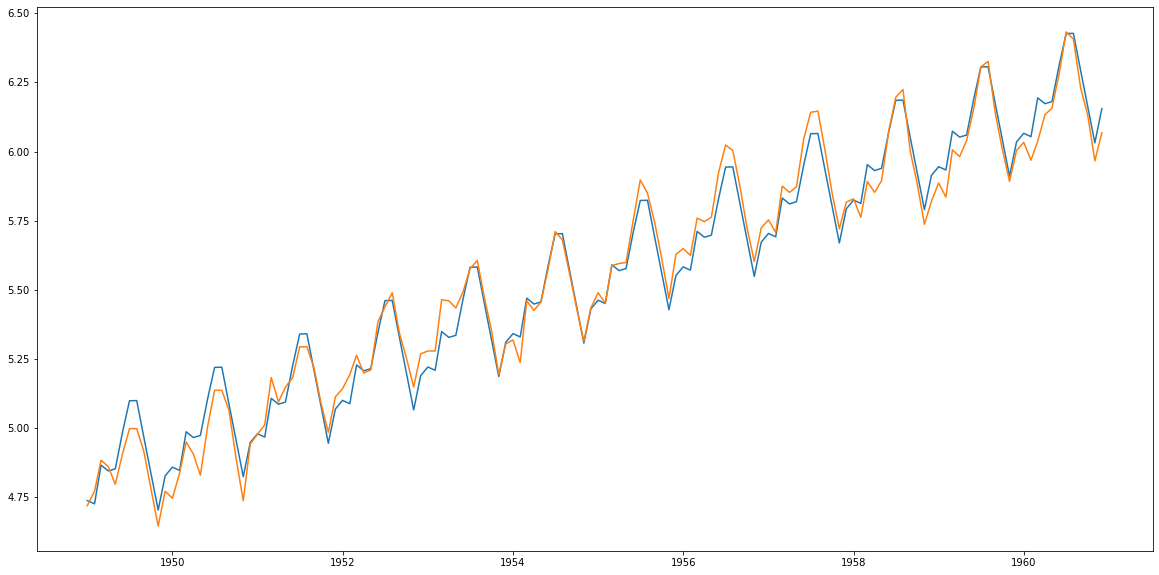

In [95]:
plt.figure(figsize=(20,10))
plt.plot(flights['date'],y_pred_3)
plt.plot(flights['date'],y3)
plt.show()

Figure(432x288)


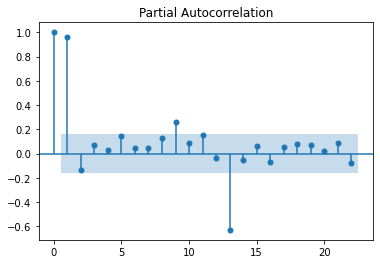

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf

print(plot_pacf(y3))